In [16]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import joblib
import xgboost as xgb

In [ ]:
df = pd.read_csv('../backend/datasets/final_boston.csv')
X = df.drop('MEDV', axis=1)
y = df['MEDV']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
best_xgb = joblib.load('../backend/models/best_xgb.pkl')
best_rf = joblib.load('../backend/models/best_rf.pkl')
best_gb = joblib.load('../backend/models/best_gb.pkl')
stacking_model = joblib.load('../backend/models/stacking_model.pkl')

In [5]:
stacking_pred = stacking_model.predict(test_X)
stacking_model_score=r2_score(test_y, stacking_pred)
print(f'R2: {r2_score(test_y, stacking_pred)}')
print(f'MAE: {mean_absolute_error(test_y, stacking_pred)}')
print(f'MSE: {mean_squared_error(test_y, stacking_pred)}')

R2: 0.8947321811955649
MAE: 1.7391385293631003
MSE: 5.377644119274145


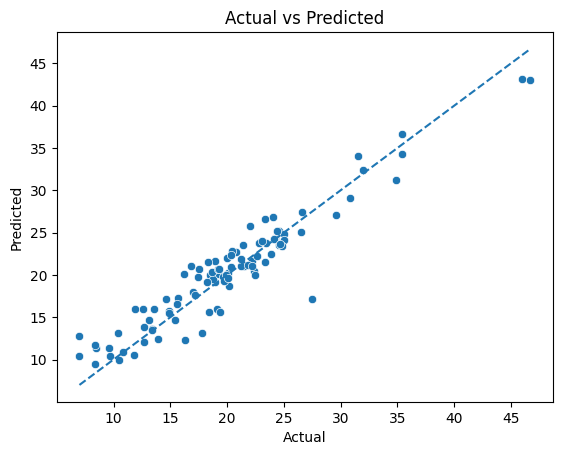

In [6]:
sns.scatterplot(x=test_y, y=stacking_pred)
plt.plot([test_y.min(), test_y.max()],
         [test_y.min(), test_y.max()],
         linestyle='--')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

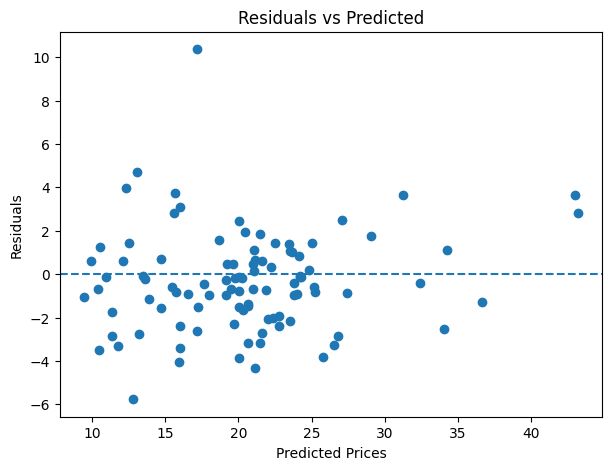

In [7]:
residuals = test_y - stacking_pred
plt.figure(figsize=(7, 5))
plt.scatter(stacking_pred, residuals)
plt.axhline(y=0, linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.show()


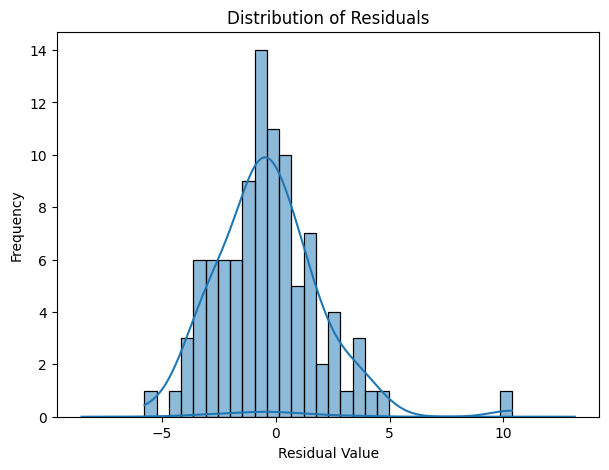

In [8]:
plt.figure(figsize=(7, 5))
sns.kdeplot(residuals)
sns.histplot(residuals, bins=30, kde=True)
plt.xlabel("Residual Value")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

In [18]:
r2_scores=[]
best_rf.fit(train_X, train_y)
r2_scores.append(r2_score(test_y, best_rf.predict(test_X)))
best_gb.fit(train_X, train_y)
r2_scores.append(r2_score(test_y, best_gb.predict(test_X)))
best_xgb.fit(train_X, train_y)
r2_scores.append(r2_score(test_y, best_xgb.predict(test_X)))
r2_scores.append(stacking_model_score)
models=['RF', 'GB', 'XGB', 'Stacking']

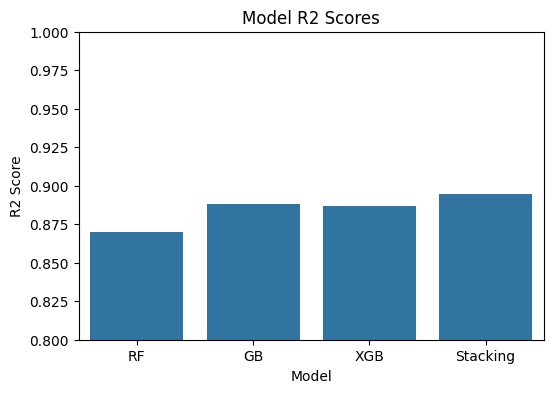

In [19]:
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=r2_scores, orient='v')
plt.ylim(0.8, 1)
plt.title('Model R2 Scores')
plt.xlabel('Model')
plt.ylabel('R2 Score')
plt.show()

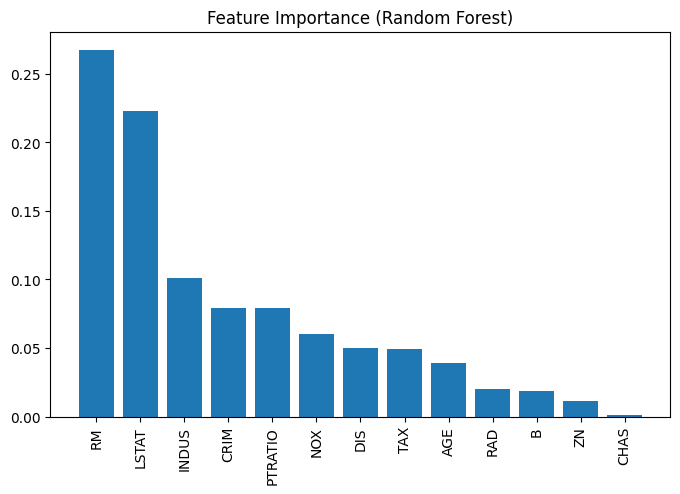

In [13]:
importances = best_rf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(8, 5))
plt.bar(range(len(importances)), importances[indices])
plt.xticks(range(len(importances)),
           train_X.columns[indices],
           rotation=90)
plt.title("Feature Importance (Random Forest)")
plt.show()

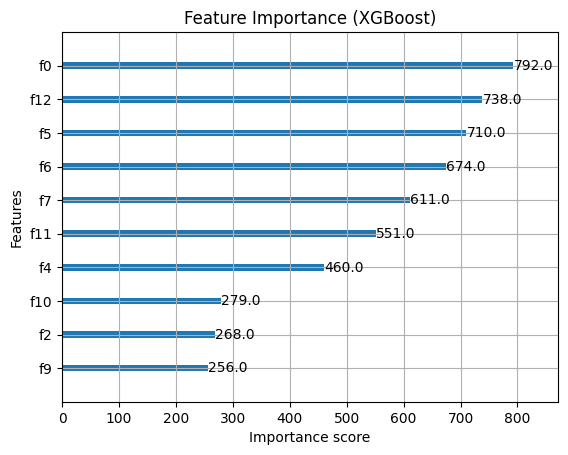

In [17]:
xgb.plot_importance(best_xgb, max_num_features=10)
plt.title("Feature Importance (XGBoost)")
plt.show()